# import libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import levene
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison

# read the file

In [4]:
fever=pd.read_csv("Fever.csv")
fever.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


# check for null values

In [5]:
fever.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

# Use boxplot to find outliers in the dataset

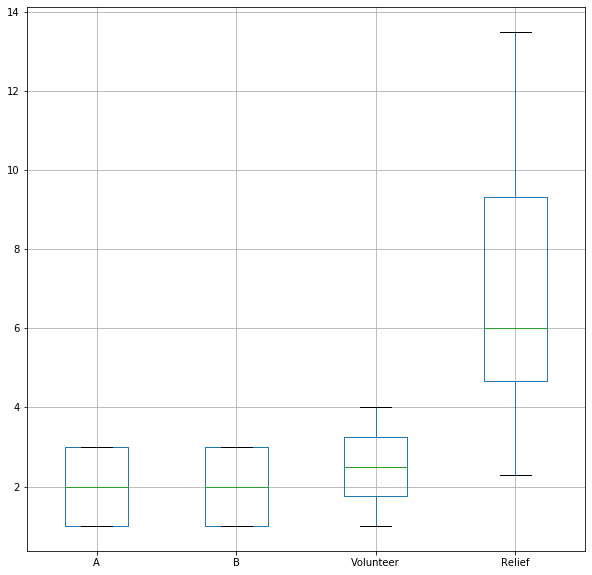

In [6]:
fig,ax=plt.subplots(figsize=(10,10))
fever.boxplot(ax=ax)
plt.show()

# Check data types in the dataset

In [7]:
fever.dtypes

A              int64
B              int64
Volunteer      int64
Relief       float64
dtype: object

# Convert the int type independent variable to categorical

In [8]:
fever['A']=pd.Categorical(fever['A'])

In [9]:
fever.dtypes

A            category
B               int64
Volunteer       int64
Relief        float64
dtype: object

# Find unique values in compund A

In [8]:
fever['A'].unique()

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

# Distplot to visualize normalcy in 'Relief' data of compund A

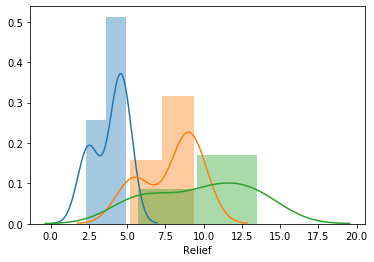

In [9]:
sns.distplot(fever[fever['A']==1]['Relief'])
sns.distplot(fever[fever['A']==2]['Relief'])
sns.distplot(fever[fever['A']==3]['Relief'])

# Shapiro test for normalcy check

In [10]:
for i in fever['A'].unique():
    print('Level',i,shapiro(fever[fever['A']==i]['Relief']))

Level 1 (0.7686296701431274, 0.004211828112602234)
Level 2 (0.728706955909729, 0.001616060733795166)
Level 3 (0.847996175289154, 0.03468279168009758)


# Levene test for test of equality in variance

In [11]:
levene(fever[fever['A']==1]['Relief'],fever[fever['A']==2]['Relief'],fever[fever['A']==3]['Relief'])

LeveneResult(statistic=4.511350350740447, pvalue=0.018535088623493387)

# Build ANOVA model and print the result

In [12]:
formula='Relief ~ C(A)'
model=ols(formula,fever).fit()
aov_table=anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


# Change int dtype compound B to categorical

In [13]:
fever['B']=pd.Categorical(fever['B'])

In [14]:
fever.dtypes

A            category
B            category
Volunteer       int64
Relief        float64
dtype: object

# Check for unique values in compund B

In [15]:
fever['B'].unique()

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

# distplot to visualize normalcy of 'Relief' data of compound B

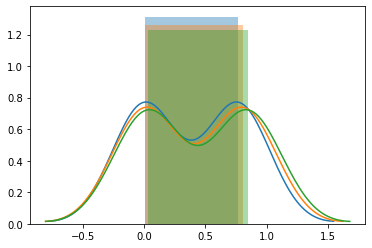

In [16]:
for i in fever['B'].unique():
    sns.distplot(shapiro(fever[fever['B']==i]['Relief']))


# Shapiro test to check for normalcy in 'Relief' data for compound B

In [17]:
for i in fever['B'].unique():
    print('Level',i,shapiro(fever[fever['B']==i]['Relief']))

Level 1 (0.7656338810920715, 0.003910908009856939)
Level 2 (0.8065383434295654, 0.01112875435501337)
Level 3 (0.8446834087371826, 0.031581711024045944)


# Levene test to check for variance equality among 'Relief' of compound B

In [18]:
levene(fever[fever['B']==1]['Relief'],fever[fever['B']==2]['Relief'],fever[fever['B']==3]['Relief'])

LeveneResult(statistic=2.941356517208818, pvalue=0.06675699295483081)

# Build ANOVA model for compund B and Relief and print result

In [19]:
formula='Relief ~ C(B)'
model=ols(formula,fever).fit()
aov_table=anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


# Interaction effect shown by pointplot between two treatments A & B on Relief

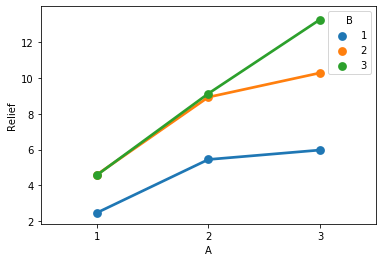

In [20]:
sns.pointplot(x='A',y='Relief',data=fever,hue='B',ci=None)

# Two-way ANOVA done using treatments compound A & B on Relief

In [21]:
formula='Relief ~ C(A)+ C(B)+ C(A):C(B)'
model=ols(formula,fever).fit()
aov_table=anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


# Tukeyhsd done on compund A to check which level has different mean of Relief

In [23]:
mc=MultiComparison(fever['Relief'],fever['A'])
result=mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2     3.95  0.001  1.7814 6.1186   True
     1      3     5.95  0.001  3.7814 8.1186   True
     2      3      2.0 0.0755 -0.1686 4.1686  False
---------------------------------------------------


# Tukeyhsd done on compund B to check which level has different mean of Relief

In [24]:
mc=MultiComparison(fever['Relief'],fever['B'])
result=mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2      3.3 0.0164  0.5374 6.0626   True
     1      3     4.35 0.0014  1.5874 7.1126   True
     2      3     1.05 0.6164 -1.7126 3.8126  False
---------------------------------------------------
